### Imports

In [1]:
import os
import skimage.io
import skimage.transform
import numpy as np
from tqdm import tqdm
import matplotlib.pylab as plt


### Images processing

In [5]:
def preprocess_images(source_path, out_path):
    # Get the list of files in the source_path folder
    filelist = os.listdir(source_path)
    
    # Create the output directory if it doesn't exist
    if not os.path.exists(out_path):
        os.makedirs(out_path)

    # Iterate over each file in the folder
    for filename in tqdm(filelist):
        if filename.endswith(".tif"):
            # Load the image
            raw_img = skimage.io.imread(os.path.join(source_path, filename))
            
            # Normalize the image
            percentile = 99.9
            high = np.percentile(raw_img, percentile)
            low = np.percentile(raw_img, 100 - percentile)
            img = np.minimum(high, raw_img)
            img = np.maximum(low, img)
            img = (img - low) / (high - low)
            img = skimage.img_as_ubyte(img)
            
            img = skimage.color.gray2rgb(img)

            # Save the transformed image as PNG format
            skimage.io.imsave(os.path.join(out_path, filename[:-3] + 'png'), img)


In [6]:
preprocess_images('data/raw/images','data/preprocessed/images')

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [02:34<00:00,  1.30it/s]


uint8 (520, 696, 3)


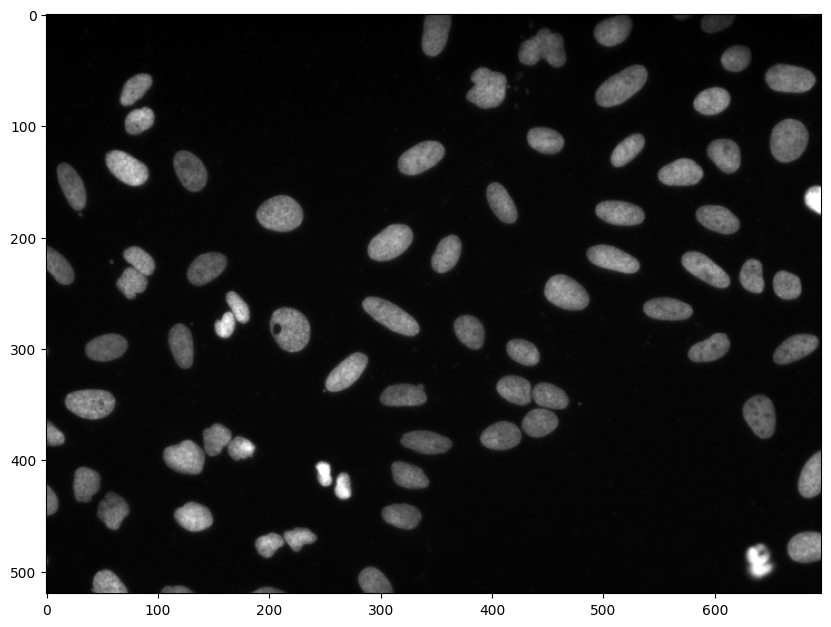

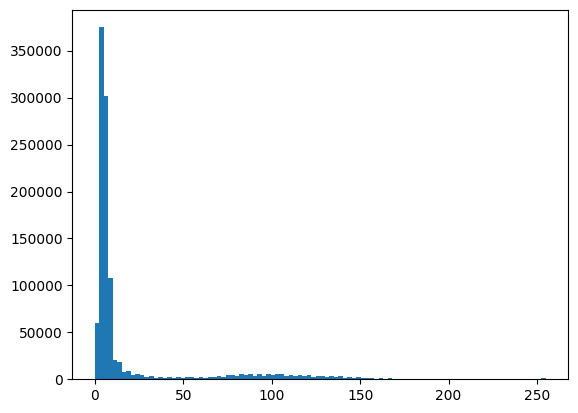

In [6]:
dir = 'data/preprocessed/images/'
filename = os.listdir(dir)
img = skimage.io.imread(dir + filename[-1])

print(img.dtype, img.shape)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
plt.hist(img.flatten(), bins=100)
plt.show()

### Masks processing

In [10]:
def preprocess_masks(source_path, out_path):
    total_objects = 0
    # Get the list of files in the source_path folder
    filelist = os.listdir(source_path)
    
    # Create the output directory if it doesn't exist
    if not os.path.exists(out_path):
        os.makedirs(out_path)

    for filename in tqdm(filelist):
    
        # GET ANNOTATION
        annot = skimage.io.imread(os.path.join(source_path, filename))
        # strip the first channel
        if len(annot.shape) == 3:
            annot = annot[:,:,0]
    
        # label the annotations nicely to prepare for future filtering operation
        annot = skimage.morphology.label(annot)
        # filter small objects, e.g. micronulcei
        annot = skimage.morphology.remove_small_objects(annot, min_size=25)
        # find boundaries
        boundaries = skimage.segmentation.find_boundaries(annot)
        for k in range(2, 2, 2):
            boundaries = skimage.morphology.binary_dilation(boundaries)
        
        # BINARY LABEL
        # prepare buffer for binary label
        label_binary = np.zeros((annot.shape + (3,)))
        # write binary label
        label_binary[(annot == 0) & (boundaries == 0), 0] = 1
        label_binary[(annot != 0) & (boundaries == 0), 1] = 1
        label_binary[boundaries == 1, 2] = 1
    
        # save it - converts image to range from 0 to 255
        skimage.io.imsave(os.path.join(out_path, filename), label_binary)
    return print("Total objects: ",total_objects)

In [11]:
preprocess_masks('data/raw/masks','data/preprocessed/masks')

 33%|███▎      | 66/200 [00:13<00:25,  5.22it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 34%|███▍      | 68/200 [00:13<00:22,  5.93it/s]C:\Users\chedl\AppData\Local\Temp\ipykernel_16420\4041023865.py:37: UserWarning: data/preprocessed/masks\IXMtest_F13_s7_w13C1B1D8C-293E-454F-B0FD-6C2C3F9F5173.png is a low contrast image
  skimage.io.imsave(os.path.join(out_path, filename), label_binary)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
 69%|██████▉   | 138/200 [00:27<00:12,  4.84it/s]C:\Users\chedl\AppData\Local\Temp\ipykernel_16420\4041023865.py:37: UserWarning: data/preprocessed/masks\IXMtest_L01_s2_w1E5

Total objects:  0


### Image Plotting

In [15]:
annot = skimage.io.imread(os.path.join('data/raw/masks', 'IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.png'))
# strip the first channel
if len(annot.shape) == 3:
    annot = annot[:,:,0]
    
# label the annotations nicely to prepare for future filtering operation
annot = skimage.morphology.label(annot)
# filter small objects, e.g. micronulcei
annot = skimage.morphology.remove_small_objects(annot, min_size=25)

print(annot.dtype, annot.shape)


int64 (520, 696)


int64 (520, 696)


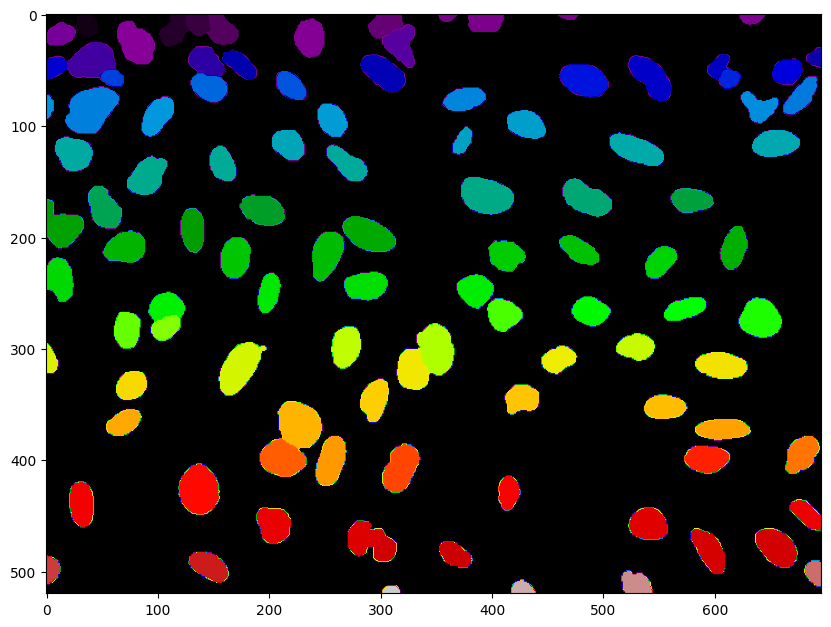

uint8 (520, 696, 3)


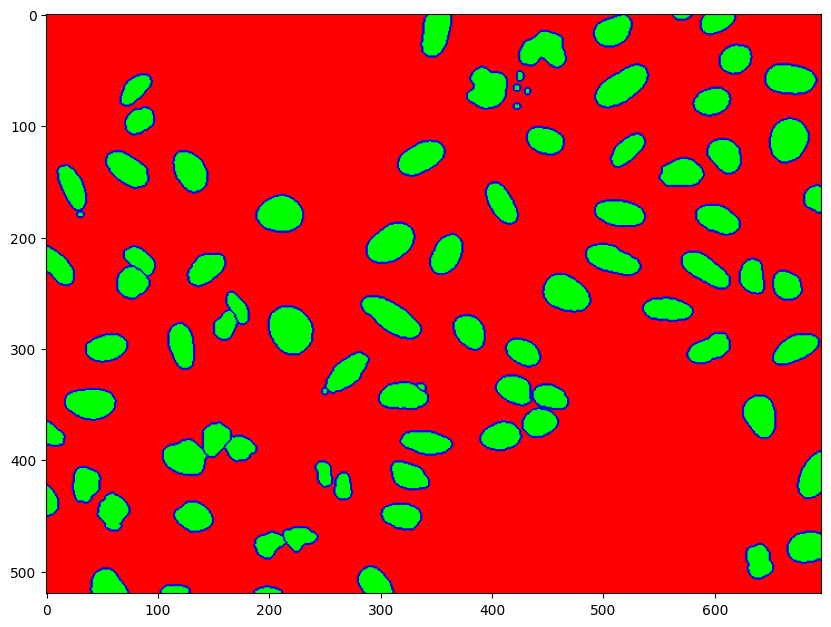

In [17]:
dir = 'data/preprocessed/masks/'
filename = os.listdir(dir)
img = skimage.io.imread(dir + filename[-1])


print(annot.dtype, annot.shape)

plt.figure(figsize=(10,10))
plt.imshow(annot, cmap='nipy_spectral')
plt.show()

print(img.dtype, img.shape)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()
